# Выполнил: Радайкин Артём, ПМ20-4, вариант 16

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import patsy as pt
import sklearn.linear_model as lm
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt

## **Индекс обрабатывающего производства по ОКВЭД2 (IP2_CEA_M) от периода T (месяц)**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Эконометрика /Семестр_6/Данные_1.xlsx')
df.tail(5)

,T,IP2_CEA_M
92,93.0,155.3
93,94.0,160.4
94,95.0,163.2
95,96.0,190.7
96,97.0,131.0


## Исходная модель регрессиии

In [ ]:
X, Y = df.drop("IP2_CEA_M",axis=1) , df["IP2_CEA_M"] 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


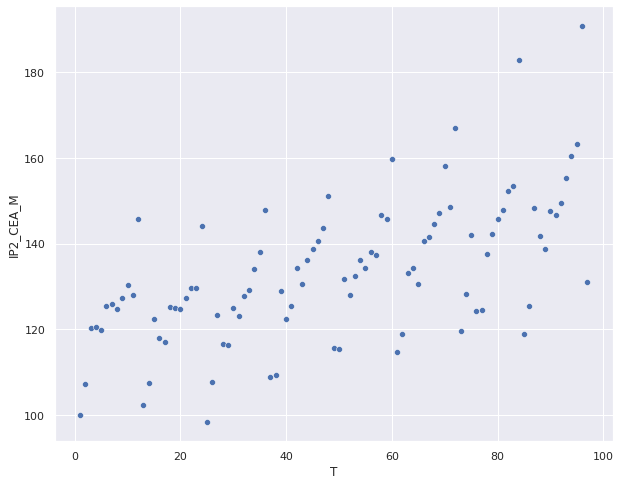

In [ ]:
sns.set()
fig, axes = plt.subplots(1,1, figsize=(10, 8))
sns.scatterplot(df['T'], Y, ax=axes);

In [ ]:
' + '.join(X.columns) 

'T'

In [ ]:
model = sm.OLS.from_formula("IP2_CEA_M ~ T",
                            data=df)
result = model.fit()
print(result.params)

Intercept    115.451933
T              0.362921
dtype: float64


In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              IP2_CEA_M   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     60.60
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           8.53e-12
Time:                        15:47:01   Log-Likelihood:                -384.35
No. Observations:                  97   AIC:                             772.7
Df Residuals:                      95   BIC:                             777.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.4519      2.631     43.881      0.0

## 1. Метод Зарембки

In [ ]:
from scipy.stats import gmean
# Среднее геометрическое
mean_geom = gmean(Y)

# Y* и ln(Y*)
Y_new = Y / mean_geom
Y_new_ln = np.log(Y_new)

df['Y_new'] = Y_new
df['Y_new_ln'] = Y_new_ln

### Рассмотрим 2 новые регресии и посчитаем ESS_1 и ESS_2

In [ ]:
model_1 = sm.OLS.from_formula("Y_new ~ T",
                            data=df)
result_1 = model_1.fit()
print(result_1.params)

Intercept    0.872877
T            0.002744
dtype: float64


In [ ]:
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_new   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     60.60
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           8.53e-12
Time:                        15:47:02   Log-Likelihood:                 89.479
No. Observations:                  97   AIC:                            -175.0
Df Residuals:                      95   BIC:                            -169.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8729      0.020     43.881      0.0

In [ ]:
# ESS_1
ESS_1 = np.sum(result_1.resid**2)
ESS_1

0.8975371549184653

In [ ]:
model_2 = sm.OLS.from_formula("Y_new_ln ~ T",
                            data=df)
result_2 = model_2.fit()
print(result_2.params)

Intercept   -0.131604
T            0.002686
dtype: float64


In [ ]:
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Y_new_ln   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     60.71
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           8.25e-12
Time:                        15:47:03   Log-Likelihood:                 91.640
No. Observations:                  97   AIC:                            -179.3
Df Residuals:                      95   BIC:                            -174.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1316      0.019     -6.765      0.0

In [ ]:
# ESS_2
ESS_2 = np.sum(result_2.resid**2)
ESS_2

0.8584212454961101

### 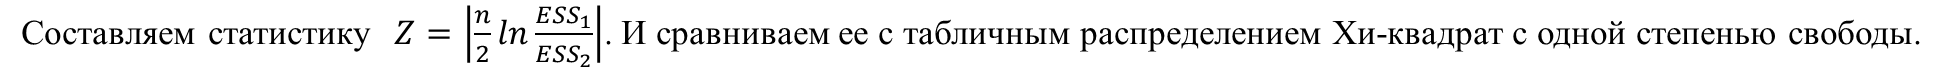

In [ ]:
Z = np.abs(len(Y)/2 * np.log(ESS_1 / ESS_2))
Z

2.1611394661292156

### Хи-квадрат(0,95; 1) статистика 

In [ ]:
sts.chi2.isf(0.05, 1)

3.8414588206941285

### Вывод:
Т.к. Хи-квадрат >  Z => гипотеза H0 не отвергается => выбираем линейную модель

## 2. Тест Бокса-Кокса

In [ ]:
# Преобразуем зависимую переменную по методу П. Зарембеки (Y_new)

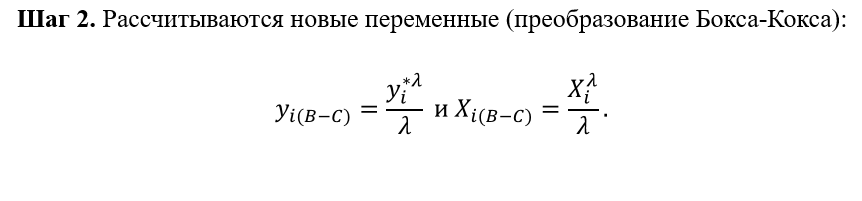

In [ ]:
Y_BC, l1 =  sts.boxcox(Y_new)
df['Y_BC'] = Y_BC

In [ ]:
X_BC, l2 =  sts.boxcox(df['T'])
df['X_BC'] = X_BC

In [ ]:
model_3 = sm.OLS.from_formula("Y_BC ~ X_BC",
                            data=df)
result_3 = model_3.fit()
print(result_3.params)

Intercept   -0.156338
X_BC         0.007538
dtype: float64


In [ ]:
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Y_BC   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     58.98
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           1.41e-11
Time:                        15:47:05   Log-Likelihood:                 91.256
No. Observations:                  97   AIC:                            -178.5
Df Residuals:                      95   BIC:                            -173.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1563      0.022     -7.030      0.0

In [ ]:
model_log = sm.OLS.from_formula("np.log(Y_BC) ~ X_BC",
                            data=df)
result_log = model_log.fit()
print(result_log.params)

Intercept   -4.284081
X_BC         0.060792
dtype: float64


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
print(result_log.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Y_BC)   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     8.383
Date:                Tue, 14 Feb 2023   Prob (F-statistic):            0.00588
Time:                        16:09:45   Log-Likelihood:                -61.071
No. Observations:                  46   AIC:                             126.1
Df Residuals:                      44   BIC:                             129.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2841      0.571     -7.502      0.0

### Сравниваем модели с помощью информационного критерия Акаике

In [ ]:
# Сравниваем модели с помощью информационного критерия Акаике
aic_linear = result_3.aic
aic_log = result_log.aic

# Выводим результаты
print('AIC для линейной модели регрессия:', aic_linear)
print('AIC для полулогарифмической модели регрессии:', aic_log)

# Определяем, какая модель лучше описывает данные
if aic_linear < aic_log:
    print('Вывод: \naic_linear < aic_log => Предпочтительнее линейная модель регрессия')
else:
    print('Вывод: \naic_linear > aic_log => Предпочтительнее полулогарифмическая модель регрессии')

AIC для линейной модели регрессия: -178.5116492106156
AIC для полулогарифмической модели регрессии: 126.14267742013993
Вывод: 
aic_linear < aic_log => Предпочтительнее линейная модель регрессия


## 3. Критерий Акаике

In [ ]:
model = sm.OLS.from_formula("Y ~ X",
                            data=df)
result = model.fit()
print(result.params)

Intercept    115.451933
X              0.362921
dtype: float64


In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     60.60
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           8.53e-12
Time:                        15:47:10   Log-Likelihood:                -384.35
No. Observations:                  97   AIC:                             772.7
Df Residuals:                      95   BIC:                             777.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.4519      2.631     43.881      0.0

In [ ]:
# ESS
ESS = np.sum(result.resid**2)
ESS

15701.764859562378

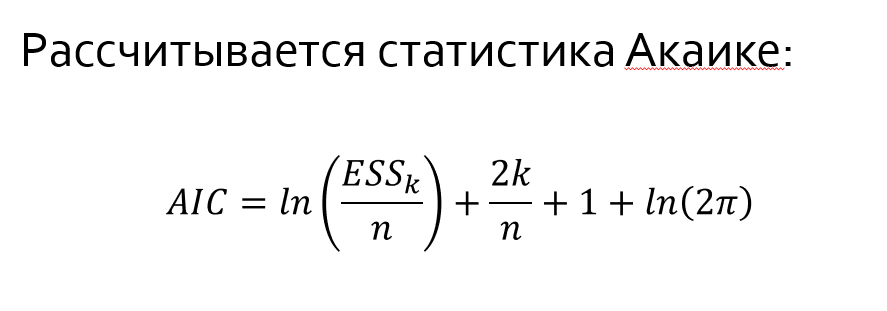

In [ ]:
# Статистика AIC линейной модели  
n = len(Y)
k = 1
AIC_1 = np.log(ESS/n) + 2*k/n + 1 + np.log(2*np.pi)
AIC_1

7.945313041062795

### Строим LN(Y_i) модель регрессии

In [ ]:
model_ln = sm.OLS.from_formula("np.log(Y) ~ X",
                            data=df)
result_ln = model_ln.fit()
print(result_ln.params)

Intercept    4.753210
X            0.002686
dtype: float64


In [ ]:
print(result_ln.summary())

                            OLS Regression Results                            
Dep. Variable:              np.log(Y)   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     60.71
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           8.25e-12
Time:                        15:47:14   Log-Likelihood:                 91.640
No. Observations:                  97   AIC:                            -179.3
Df Residuals:                      95   BIC:                            -174.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7532      0.019    244.336      0.0

In [ ]:
# ESS_ln
ESS_ln = np.sum(result_ln.resid**2)
ESS_ln

0.8584212454961109

In [ ]:
# Статистика AIC полулогарифмической модели  
n = len(Y)
k = 1
AIC_2 = np.log(ESS_ln/n) + 2*k/n + 1 + np.log(2*np.pi)
AIC_2

-1.8688756932529689

### Вывод:
Т.к. AIC_1 > AIC_2 => Выбираем модель с наименьшим значением статистики Акаике, т.е. выбираем полулогарифмическую модель 

## 4. Критерий Шварца 

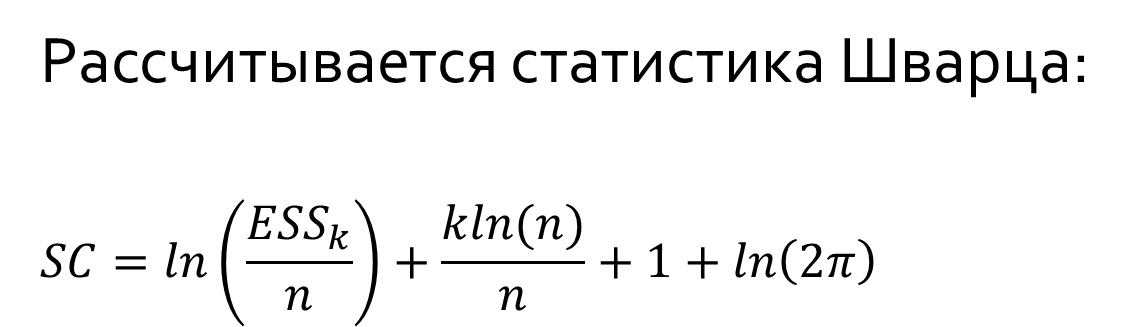

In [ ]:
SC_1 = np.log(ESS/n) + (k*np.log(n)) / n + 1 + np.log(2*np.pi)
SC_1

7.971856453212314

In [ ]:
SC_2 = np.log(ESS_ln/n) + (k*np.log(n)) / n + 1 + np.log(2*np.pi)
SC_2

-1.8423322811034497

### Вывод:
Т.к. SC_1 > SC_2 => Выбираем модель с наименьшим значением статистики Шварца, т.е. выбираем полулогарифмическую модель 

## 5. Тест Дэвидсона

Тест Дэвидсона (Davidson test) - это статистический тест на отсутствие линейности в регрессии. Он позволяет проверить, насколько хорошо модель линейной регрессии описывает данные и определить, следует ли использовать полулогарифмическую модель.

In [ ]:
import statsmodels.api as sm

# Применяем тест Дэвидсона
test = sm.stats.diagnostic.linear_harvey_collier(result)

# Выводим результаты теста
print('P-value:', test[1])
print('Test statistic:', test[0])

# Определяем, какая модель лучше описывает данные
if test[1] > 0.05:
    print('Вывод: \nГипотеза H0 принимается => Предпочтительнее линейная модель регрессия')
else:
    print('Вывод: \nГипотеза H0 не принимается => Предпочтительнее полулогарифмическая модель регрессии')

P-value: 0.7841840363526192
Test statistic: -0.27466345195831615
Вывод: 
Гипотеза H0 принимается => Предпочтительнее линейная модель регрессия
